In [351]:
import numpy as np
import scipy.integrate as spInt
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline


# Model definition
b = 2 # Dampener coefficient (b) - Turn this up to increase the rise time
k = 3 # Spring constant - Turn this down to decrease the rise time
y0 = [0] # Initial amount of force
timeToSolve = (0,10) # Time interval in seconds to solve the ODE over
steps = 10000 # Number of steps

# Contraction Element (actuator) parameters
maxForce = 0.7
activationTime = 500 # In ticks
offTime = 100 # In Ticks

Text(0.5, 1.0, 'Activation')

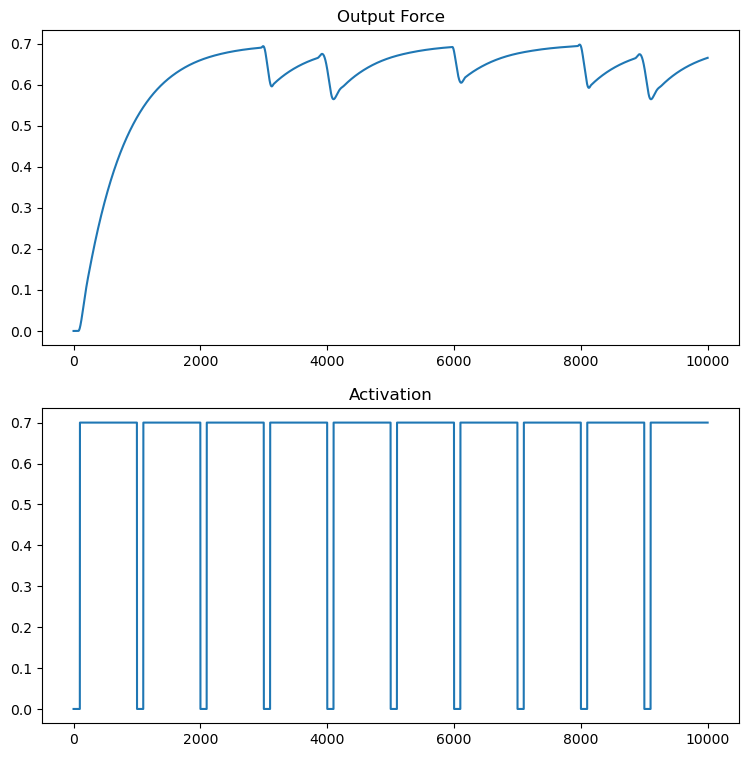

In [352]:
timeArray = np.linspace(timeToSolve[0],timeToSolve[1],steps, dtype=np.float64)
stimForce = np.ones_like(timeArray)

onOrOff = -1
for x in range(0, len(stimForce)-offTime, activationTime):
    stimForce[x:x+offTime] = onOrOff
    onOrOff *= -1
stimForce[stimForce==-1] = 0
stimForce = stimForce*maxForce
idxArray = list(range(0,len(timeArray)))
odeArgs = (b, k, stimForce,timeArray)
y = spInt.solve_ivp(muscleModelODE, t_span=timeToSolve, t_eval=timeArray, y0=y0, args=odeArgs)
f, (ax1, ax2) = plt.subplots(2)
ax1.plot(y.y[0])
ax2.plot(stimForce)
f.set_size_inches(9,9)
ax1.set_title("Output Force")
ax2.set_title("Activation")

In [353]:
#solve_ivp functions must be in the form func(t, y) D:
def muscleModelODE(t, y, b, k, drivingForce, timeArray):
    # fill in the gap
    diffArray = np.absolute(timeArray-t)
    idx = diffArray.argmin()
    dydt = [((k/b)*(drivingForce[idx] - y))]
    return dydt

In [354]:
def activationFunction()

SyntaxError: expected ':' (3881453688.py, line 1)